<hr/>

# Data Mining

<hr/>

<h2><font color="darkblue">Exam 1</font></h2>

#### Deadline
Submit by 1:15pm on Blackboard. Don't wait till the last minute!

#### Python packages

Use only the `numpy` and `matplotlib` routines for calculations and plotting. 
You may also use the `pandas` package for data access and manipulation via the `DataFrame`, if needed.

####  Work alone!
Feel free to use the lecture notes and other resources but work on your own!  



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Problem 1

The attached [CSV](E1-Problem.csv) file contains 3 columns $(x,y,z)$ and hundreds of rows. Visualize and describe the dataset to gain some insight. 

1. Plot the 3-D dataset from different points of view to gain some insight (2 pts)
1. Calculate the sample averages of each column (2 pts)
1. Calculate the sample variances of each column (2 pts)
1. Calculate the skewness of each column (2 pts)
1. Calculate the covariances (2 pts)
1. Summarize your findings with your words (2 pts)

Total of 12 points

(443, 3)
[[ 2.47256425  2.81373407 -0.08376469]
 [ 1.43989801  5.58015879  2.7262919 ]
 [ 3.52040404 -2.82204179  0.03644734]
 [ 2.72714421  0.02186873  2.13499988]
 [-1.71516436  2.88874526  1.12292944]]


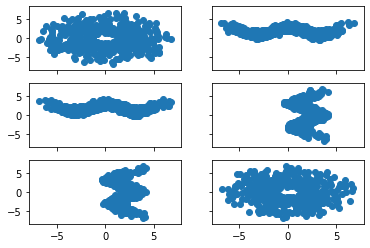

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('E1-Problem.csv')
data = df.values # numpy array
print (data.shape)
print (data[:5])

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True)

ax1.scatter(data[:,0], data[:,1]);
ax2.scatter(data[:,0], data[:,2]);
ax3.scatter(data[:,1], data[:,2]);
ax4.scatter(data[:,2], data[:,1]);
ax5.scatter(data[:,2], data[:,0]);
ax6.scatter(data[:,1], data[:,0]);

In [3]:
def normMoments(X,k,xbar,N,s):
    return np.sum((X-xbar)**k , axis =0)/((N-1)*s**k);

### Column 1 Data 

In [4]:
X = data[:,0]
N   = len(X);
avg = np.mean(X);
s2  = np.sum( (X-avg)**2, axis=0) /(N-1);
s   = np.sqrt(s2);
cov = np.cov(X);

skeweness = normMoments(X,3,avg,N,s);

print ('The Average of Column 1  of the data set is %f' % (avg))
print ('The Variance of Column 1 of the data set is %f' % (s2))
print ('The Skeweness of Column 1 of the data set is %f' % (skeweness))
print ('The Covariance of Column 1 of the data set is %f' % (cov))

The Average of Column 1  of the data set is -0.069552
The Variance of Column 1 of the data set is 8.750266
The Skeweness of Column 1 of the data set is -0.027313
The Covariance of Column 1 of the data set is 8.750266


### Column 2 Data

In [5]:
X   = data[:,1]
N   = len(X);
avg = np.mean(X);
s2  = np.sum( (X-avg)**2, axis=0) /(N-1);
s   = np.sqrt(s2);
cov = np.cov(X);

skeweness = normMoments(X,3,avg,N,s);


print ('The Average of Column 2  of the data set is %f' % (avg))
print ('The Variance of Column 2 of the data set is %f' % (s2))
print ('The Skeweness of Column 2 of the data set is %f' % (skeweness))
print ('The Covariance of Column 2 of the data set is %f' % (cov))

The Average of Column 2  of the data set is 0.057702
The Variance of Column 2 of the data set is 8.040261
The Skeweness of Column 2 of the data set is 0.041105
The Covariance of Column 2 of the data set is 8.040261


### Column 3 Data

In [6]:
X   = data[:,2]
N   = len(X);
avg = np.mean(X);
s2  = np.sum( (X-avg)**2, axis=0) /(N-1);
s   = np.sqrt(s2);
cov = np.cov(X);

skeweness = normMoments(X,3,avg,N,s);


print ('The Average of Column 3  of the data set is %f' % (avg))
print ('The Variance of Column 3 of the data set is %f' % (s2))
print ('The Skeweness of Column 3 of the data set is %f' % (skeweness))
print ('The Covariance of Column 3 of the data set is %f' % (cov))

The Average of Column 3  of the data set is 1.821845
The Variance of Column 3 of the data set is 0.999743
The Skeweness of Column 3 of the data set is 0.003539
The Covariance of Column 3 of the data set is 0.999743


## Problem 2

Use generalized linear regression to fit $z$ using the following family of functions, 

> $\displaystyle f(x,y;\boldsymbol{\beta}) = \sum_k \beta_k \,\phi_k(x,y)$
> <br>
> where
> <br>
> $\displaystyle \phi_0(x,y) = 1$
> <br>
> $\displaystyle \phi_1(x,y) = x$
> <br>
> $\displaystyle \phi_2(x,y) = y$
> <br>
> $\displaystyle \phi_3(x,y) = \sin(x)$
> <br>
> $\displaystyle \phi_4(x,y) = \cos(x)$
> <br>
> $\displaystyle \phi_5(x,y) = \sin(y)$
> <br>
> $\displaystyle \phi_6(x,y) = \cos(y)$


1. Construct the design matrix `X` from the given dataframe `df` for the above problem (3 pts)
2. Derive the best $\hat{\boldsymbol{\beta}}$ coefficients (3 pts)
3. Derive the estimated values $\hat{z}_i=f(x_i,y_i;\hat{\boldsymbol{\beta}})$ for each data point $i$ (2 pts)
3. Plot the histogram of the $\{(z_i\!-\!\hat{z}_i)\}$ residuals (2 pts)
4. Based on the best fit, estimate the $\hat{z}$ at the origin of the $x\!-\!y$ plane, i.e., calculate the $f(0,0;\hat{\boldsymbol{\beta}})$ value (3 pts)

Total of 13 points

In [7]:
x = data[:,0];
y = data[:,1];
z = data[:,2]
X = np.ones((data[:,0].size,7));

X[:,1] = x;
X[:,2] = y;
X[:,3] = np.sin(x);
X[:,4] = np.cos(x);
X[:,5] = np.sin(y);
X[:,6] = np.cos(y);

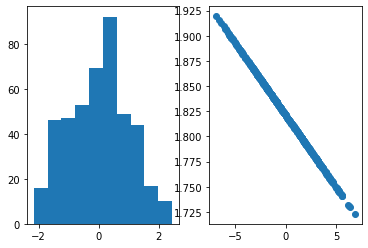

In [12]:
Xpinv = dot(inv(dot(X.T,X)),X.T);
bHat = Xpinv.dot(data);
zHat = dot(X,bHat)

fig, ((ax1, ax2)) = plt.subplots(1, 2)


shape(zHat)

for n in range(1,2): # for loop, n from 1 to 6
    X0 = np.ones((x.size,2));
    X0[:,1] = X[:,n]
    Xpinv = dot(inv(dot(X0.T,X0)),X0.T); 
    bHat = dot(Xpinv,z) # Calculating Beta Coefficients for current Trial Set 
    zHat = dot(X0,bHat) # Calcualting zHat 
    zRes = z-zHat       # calcualting z Residual
    ax1.hist(zRes)      # Plotting histogram 
    ax2.plot(x, zHat, 'o',label=n)